In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import seaborn as sns

%matplotlib inline

In [3]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
train_df.shape

(7613, 5)

### EDA

In [4]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [15]:
train_df.keyword.value_counts()[:5]

missing       61
fatalities    45
deluge        42
armageddon    42
sinking       41
Name: keyword, dtype: int64

In [6]:
train_df.fillna("missing",inplace=True)
test_df.fillna("missing",inplace=True)

In [10]:
train_df.isna().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [16]:
train_df.location.value_counts()[:5]

missing          2533
USA               104
New York           71
United States      50
London             45
Name: location, dtype: int64

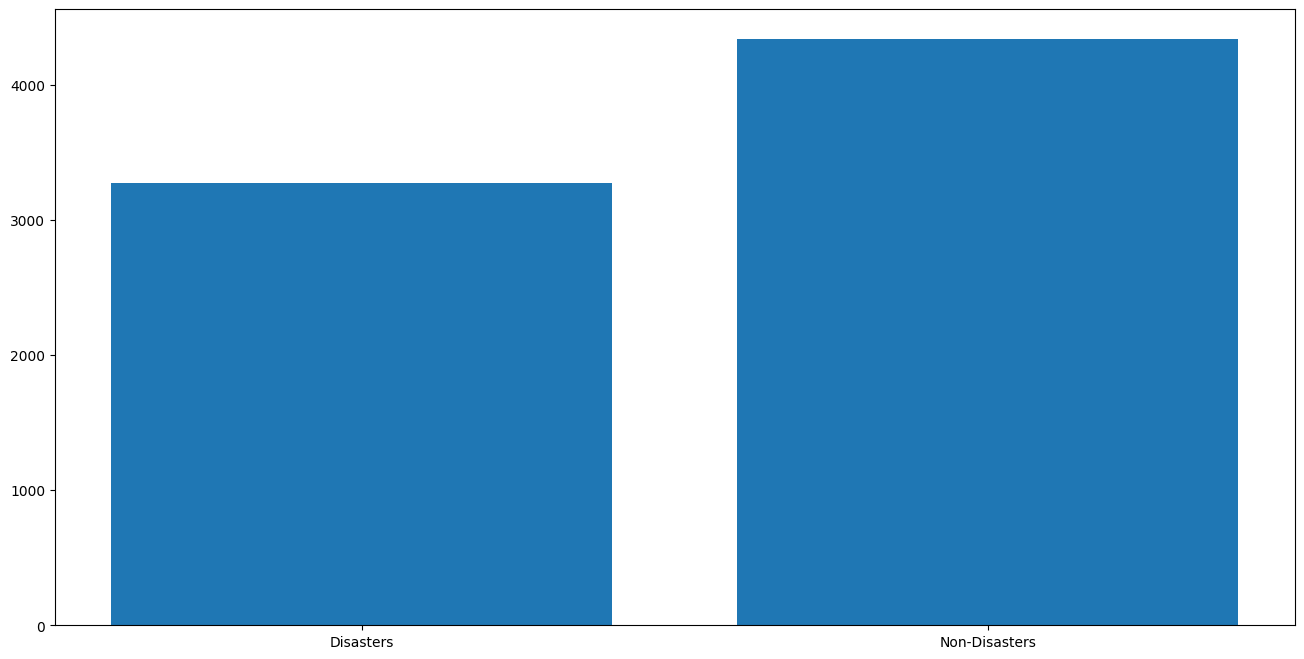

In [13]:
disasters = train_df[train_df.target == 1].shape[0]
non_disasters = train_df[train_df.target == 0].shape[0]

plt.figure(figsize=(16,8))
plt.bar(["Disasters","Non-Disasters"], [disasters,non_disasters]);

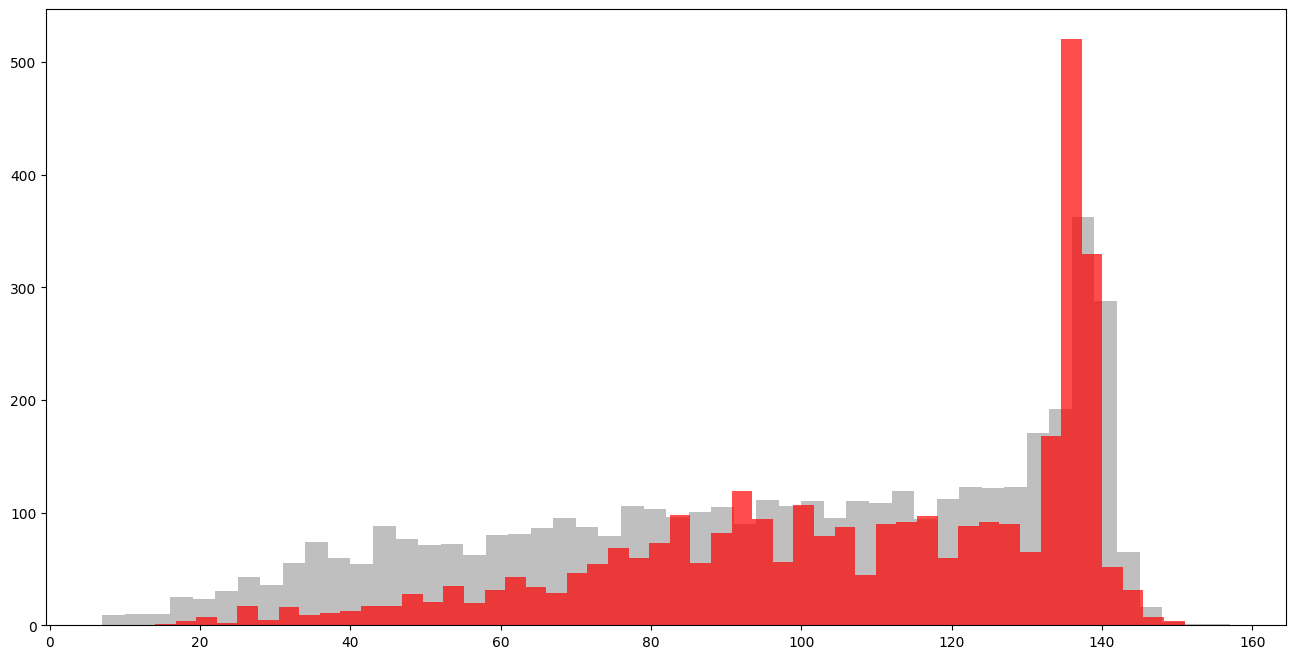

In [17]:
def plot_target_based_features(feature):
    x1 = train_df[train_df.target == 1][feature]
    x2 = train_df[train_df.target == 0][feature]
    plt.figure(figsize=(16,8))
    plt.hist(x2,alpha=0.5,color="grey",bins=50)
    plt.hist(x1,alpha=0.7,color="red",bins=50)
    
train_df["text_len"] = train_df.text.map(lambda x: len(x))
plot_target_based_features("text_len")

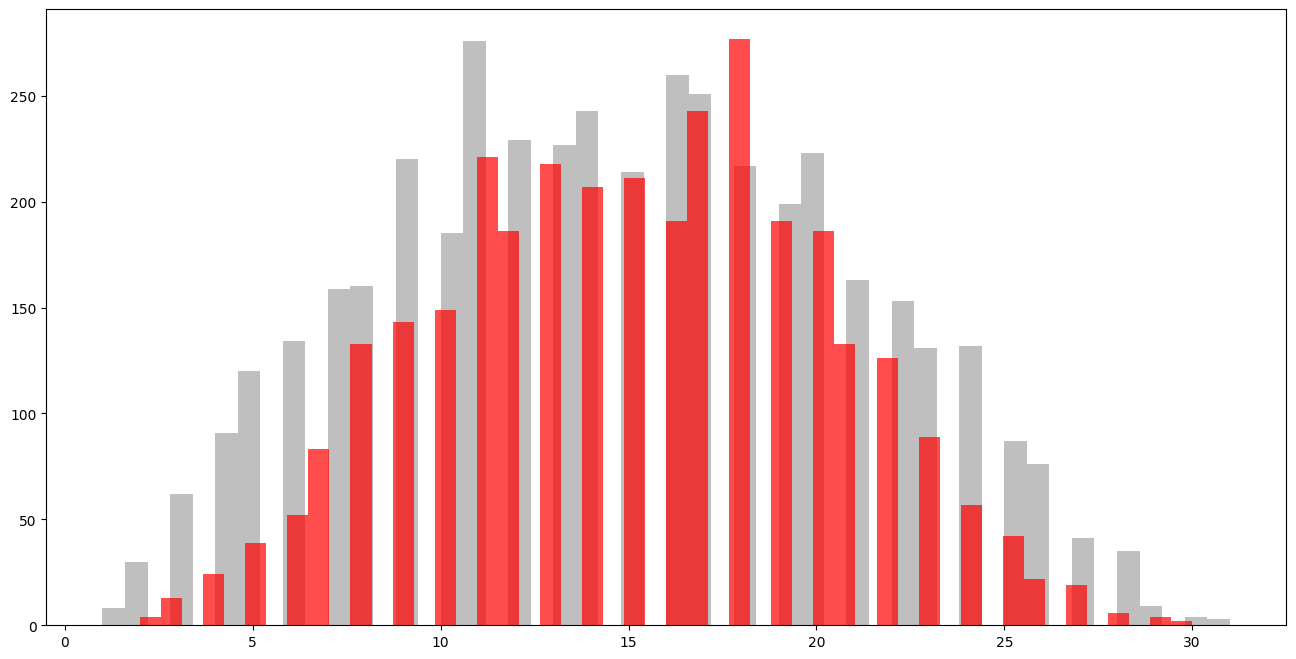

In [18]:
train_df["words_count"] = train_df.text.str.split().map(lambda x: len(x))
plot_target_based_features("words_count")

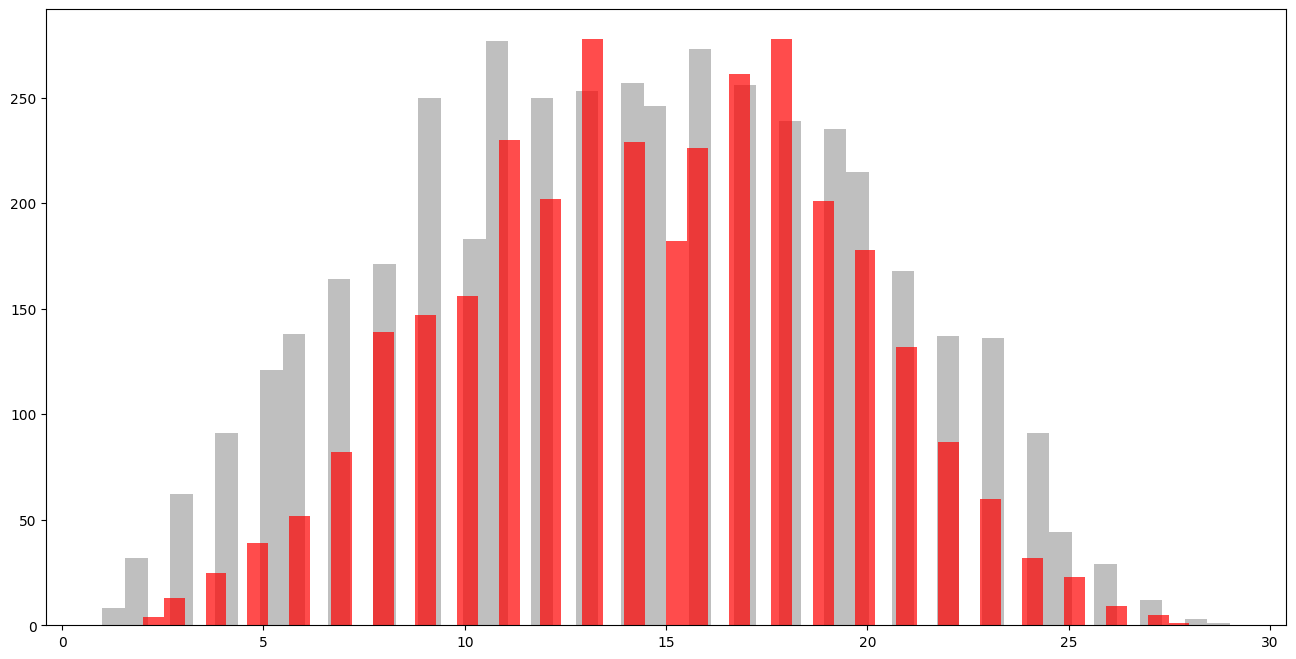

In [20]:
train_df["unique_word_count"] = train_df.text.map(lambda x:len(set(str(x).split())))
plot_target_based_features("unique_word_count")

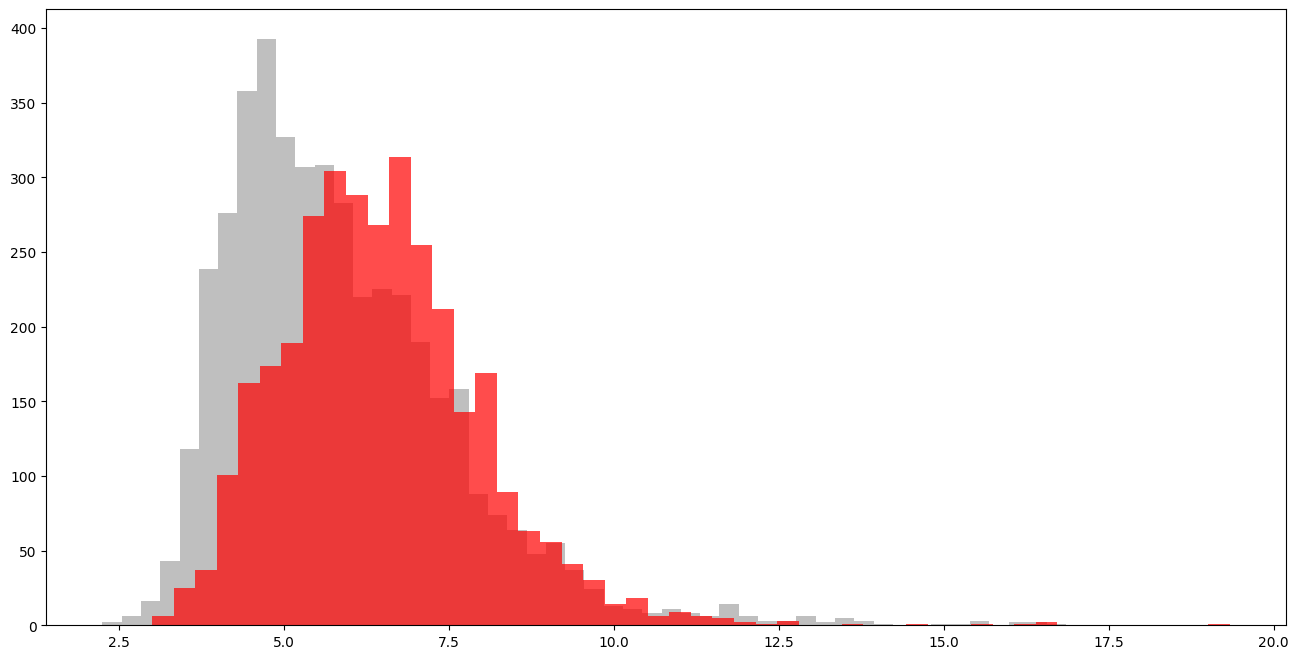

In [22]:
train_df["mean_word_length"] = train_df.text.map(
    lambda x: np.mean([len(w) for w in str(x).split()])
)
plot_target_based_features("mean_word_length")